# Welcome to CS4243 Tutorial 1 Lecture 4
In this tutorial, we will walk through examples of Hough transform for line and circle. 

You can opt to use images provided it the zipped folder or use your own image to run demo.

### Part 1
#### Hough transform for line detection

In [2]:
# Import the necessary packages that will be used in the following implementation
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

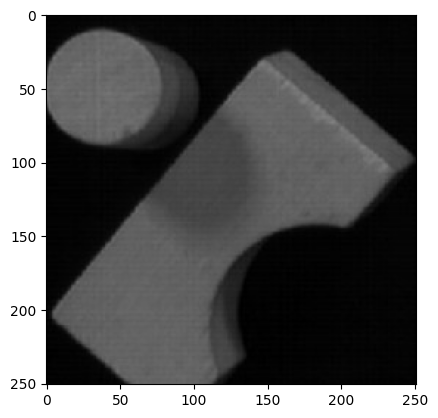

In [32]:
# Reading the image for edge extraction
img = cv2.imread('Input-Files/Line.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')


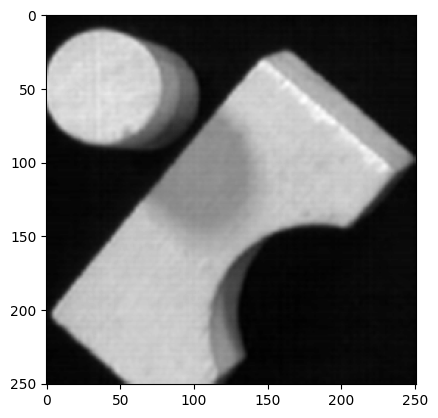

In [21]:
# Apply Gaussian blur
kernel_size = (3, 3)
sigma = 2
img_blurred = cv2.GaussianBlur(img_gray, kernel_size, sigma)
plt.imshow(img_blurred, cmap='gray')

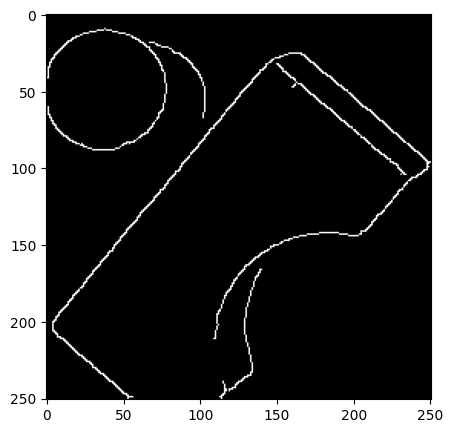

In [22]:
# Use Canny to detect edge
edges = cv2.Canny(img_blurred, 60, 110, apertureSize=3)
plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')

In [27]:
def calc_y(x, rho, theta):
    if theta == 0:
        # prevent divide by zero
        return rho
    else:
        return (-math.cos(theta) / math.sin(theta)) * x + (rho / math.sin(theta))

height, width,_ = img.shape

def polar_to_xy(rho, theta):
    x1 = 0
    x2 = width
    y1 = int(calc_y(0, rho, theta))
    y2 = int(calc_y(width, rho, theta))
    return (x1, y1), (x2, y2)
    
# Draw lines
def draw_line(lines, image):
    image_output = image.copy()

    red = (255, 0, 0)

    for rho, theta in lines[:,0,]:
        (x1, y1), (x2, y2) = polar_to_xy(rho, theta)
        cv2.line(image_output, (x1, y1), (x2, y2), red, 1, cv2.LINE_AA)
        
    plt.figure(figsize=(5, 5))
    plt.imshow(image_output)

Next, we use OpenCV to perform hough transform

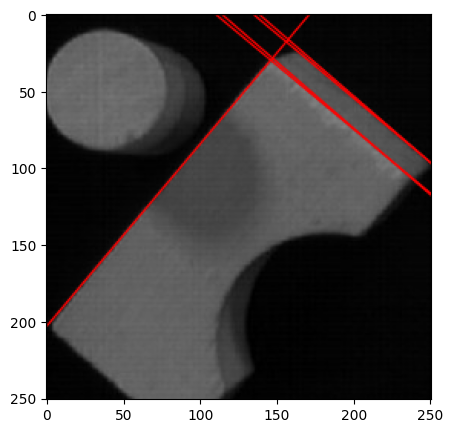

In [31]:
rho = 1 # 1 pixel increments
theta = np.pi/180.0 # 1 degree increments

# Set threshold as 80 when performing cv2.HoughLines
########################Your code here###########################



########################Your code here###########################

# each line is represented by (rho, theta), where rho is a distance and theta is the line's angle (in radians)
# the line uses this formula: rho = x cos theta + y sin theta

# first five lines:
lines[:5, 0]
draw_line(lines, img)

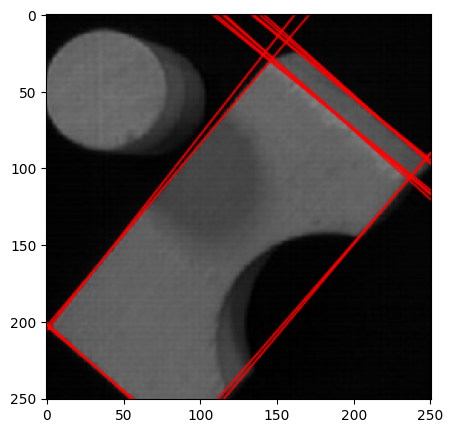

In [34]:
# Set threshold as 50 when performing cv2.HoughLines
########################Your code here###########################



########################Your code here###########################

draw_line(lines, img)

# Part 2
#### Hough Transform for Circle Detection

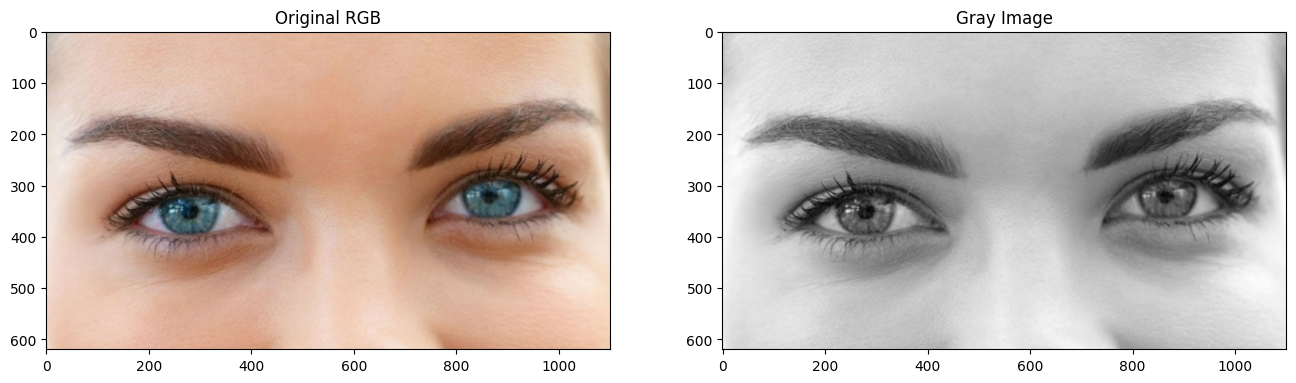

In [13]:
# Read image
img = cv2.imread('Input-Files/Circle.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (16,5))
plt.subplot(1, 2, 1)
plt.title('Original RGB')
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.title('Gray Image')
plt.imshow(img_gray, cmap = plt.get_cmap(name = 'gray'))

In [14]:
# Draw detected circles
def draw_circle(circles, image):
    output_image = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw outer circle
            cv2.circle(output_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Show result
        plt.title('Circle detection using Hough Transform')
        plt.imshow(output_image)
    else:
        print('No circle found')

[[[868.5 311.5  58.9]
  [277.5 346.5  58.9]]]


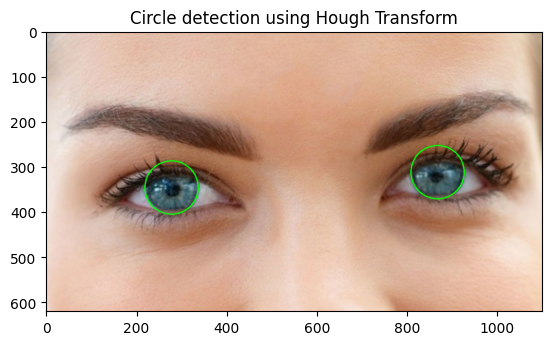

In [15]:
# Blur the image with Median filter with size of 5 to reduce noise
########################Your code here###########################



########################Your code here###########################

# Apply hough transform on the image with minRadius=50, maxRadius=65 and minDist=40
# Set param1 and param2 as {80, 20} 
########################Your code here###########################



########################Your code here###########################

print(circles)
draw_circle(circles, img_rgb)


[[[ 874.5  317.5   51.2]
  [ 271.5  350.5   55.6]
  [ 200.5  361.5   55.6]
  [ 872.5  225.5   63.3]
  [ 930.5  233.5   63.3]
  [ 291.5  243.5   63.3]
  [ 954.5  312.5   63.3]
  [ 819.5  296.5   61.1]
  [ 312.5  353.5   56.6]
  [ 230.5  393.5   54.4]
  [ 351.5  370.5   56.7]
  [ 225.5  284.5   63.3]
  [ 201.5  316.5   57.7]
  [ 338.5  254.5   53.4]
  [ 195.5  231.5   64.4]
  [ 294.5  290.5   55.5]
  [ 155.5  322.5   55.5]
  [ 911.5  295.5   64.4]
  [ 175.5  271.5   61.1]
  [ 842.5  344.5   64.4]
  [ 946.5  196.5   61.1]
  [ 966.5  253.5   64.4]
  [ 378.5  277.5   55.5]
  [ 254.5  449.5   53.3]
  [ 378.5  404.5   64.4]
  [1005.5  228.5   54.3]
  [ 215.5  170.5   55.6]
  [1008.5  290.5   50.5]
  [ 787.5  144.5   64.4]
  [ 967.5  406.5   51.1]
  [ 125.5  285.5   59.9]
  [ 226.5  115.5   57.8]]]


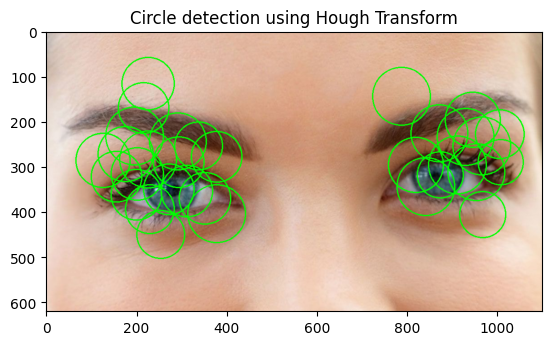

In [16]:
# Set param1 and param2 as {80, 10} 
########################Your code here###########################



########################Your code here###########################

print(circles)
draw_circle(circles, img_rgb)


[[[278.5 349.5  55.6]
  [867.5 313.5  58.9]
  [180.5 376.5  55.6]
  [374.5 387.5  55.6]]]


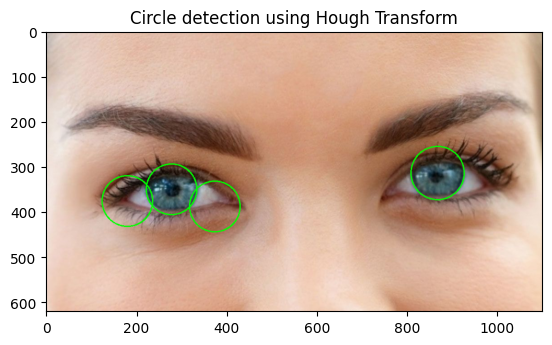

In [18]:
# Set param1 and param2 as {50, 20} 
########################Your code here###########################



########################Your code here###########################

print(circles)
draw_circle(circles, img_rgb)

[[[270.5 347.5  64.4]
  [881.5 221.5  58.9]
  [333.5 259.5  63.3]
  [866.5 316.5  58.9]
  [925.5 238.5  63.3]
  [244.5 271.5  54.4]]]


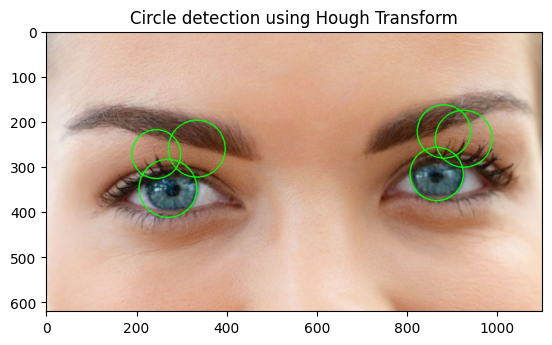

In [19]:
# Apply circle detection on the unblurred image using the best parameters found above and check for differences in the output
########################Your code here###########################



########################Your code here###########################

print(circles)
draw_circle(circles, img_rgb)